In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## 1.1

In [10]:
def get_degrees(graph, offset = 0):
    return [deg + offset for _, deg in graph.degree]

In [11]:
def generate_ba(n, m, m0):
    """
    n - number of nodes
    m0 - number of isolated nodes at time 0,
    m - degree of new node, m <= m0
    """
    graph = nx.Graph()

    graph.add_nodes_from(range(m0))

    for j in range(m0, n):
        """
        probability of edge (j, i) is proportional to degree of node i
        """

        degrees = get_degrees(graph, 1)

        total = sum(degrees)

        neighbor = np.random.choice(graph.nodes(), size=m, p=[deg / total for deg in degrees])

        for i in neighbor:
            graph.add_edge(j, i)

    return graph

In [21]:
params = [(3, 10**2), (3, 10**3), (2, 10**4)]
# params = [(3, 10**2), (3, 10**3), (2, 10**5), (3, 10**5)]

graphs = []

for m, n in params:
    graph = generate_ba(n, m, m)
    graphs.append(graph)
    
    print(graph)
    
    nx.write_gpickle(graph, f"./graphs/graph_{n}_{m}.gpickle")

Graph with 100 nodes and 278 edges
Graph with 1000 nodes and 2968 edges
Graph with 10000 nodes and 19981 edges


## 1.2

Coefficient: -1.1924537192411295


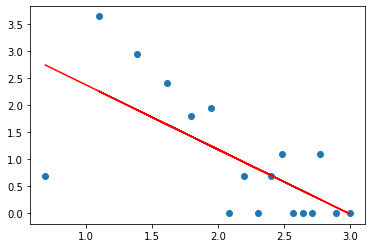

Coefficient: -1.7912829691952086


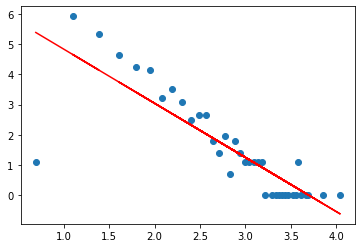

Coefficient: -1.7708369667610486


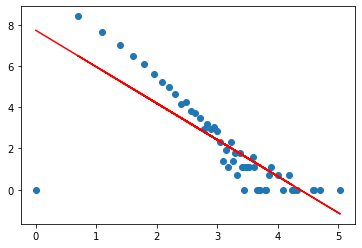

In [40]:
from collections import Counter

for graph in graphs:
    degree_count = Counter(get_degrees(graph))
    
    x = np.array(list(degree_count.keys()))
    y = np.array(list(degree_count.values()))
    
    xlog = np.log(x)
    ylog = np.log(y)
    
    A = np.vstack([xlog, np.ones(len(xlog))]).T
    
    m, c = np.linalg.lstsq(A, ylog, rcond=None)[0]
    
    print(f"Coefficient: {m}")
    
    plt.scatter(xlog, ylog)
    plt.plot(xlog, m*xlog + c, 'r')
    plt.show()
    
    # plt.scatter(y, x)
    # plt.plot(x, x ** m, c='g')
    # plt.show()

## 1.3

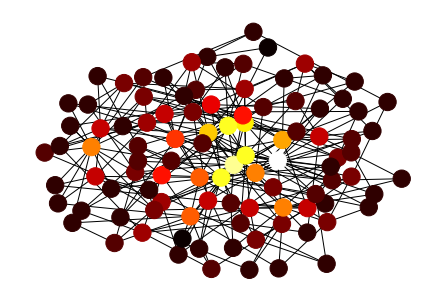

In [25]:
nx.draw_kamada_kawai(graphs[0], node_color=get_degrees(graphs[0]), cmap='hot')
plt.show()

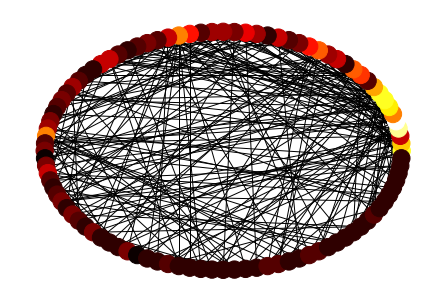

In [26]:
nx.draw_circular(graphs[0], node_color=get_degrees(graphs[0]), cmap='hot')
plt.show()

## 2.1

### Average Shortest Path

In [53]:
def avg_shortest_path(graph):
    N = len(graph.nodes())
    
    s = 0
    
    path_lengths = dict(nx.shortest_path_length(graphs[0]))    
    
    
    for i in graph.nodes():
        for j in graph.nodes():
            if i == j:
                continue
                
            s += path_lengths[i][j]
    
    return s / (N * (N - 1))

In [54]:
avg_shortest_path(graphs[0])

2.718989898989899

In [49]:
nx.average_shortest_path_length(graphs[0])

2.718989898989899

### Efficiency

In [56]:
nx.global_efficiency(graphs[0])

0.40962962962966504

In [86]:
def measure_resiliency(error_or_attack):
    graph = graphs[0].copy()

    max_iters = 1000

    x = []
    L = []
    E = []

    try:
        for i in range(max_iters):
            error_or_attack(graph)
            
            L.append(nx.average_shortest_path_length(graph))
            E.append(nx.global_efficiency(graph))
            x.append(i)
    except nx.NetworkXError:
        pass

    plt.title('Average Shortest Path Length')
    plt.scatter(x, L, c='b')
    plt.show()

    plt.title('Global Efficiency')
    plt.scatter(x, E, c='r')
    plt.show()

### A
    Remove a random node with uniform probability
  

In [87]:
def random_error(graph):
    node = np.random.choice(graph.nodes())
    graph.remove_node(node)

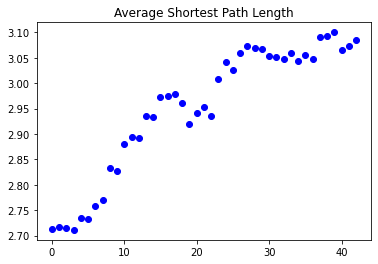

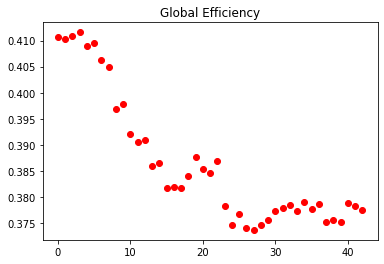

In [91]:
measure_resiliency(random_error)

### B
    Remove a random node with probality proportional to degree of node

In [59]:
def attack(graph):
    degrees = get_degrees(graph, 1)

    total = sum(degrees)

    node = np.random.choice(graph.nodes(), p=[deg / total for deg in degrees])
    
    graph.remove_node(node)

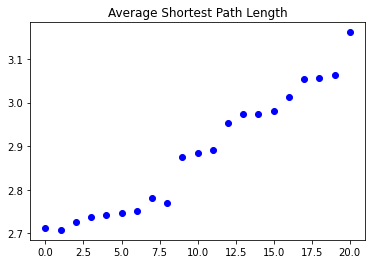

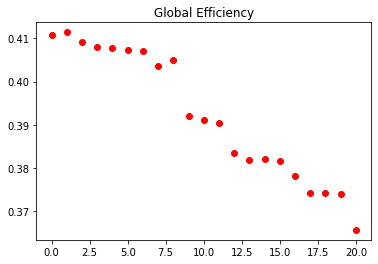

In [95]:
measure_resiliency(attack)